# Практическая работа №3: Кластерный анализ
Выполнил студент гр. 0373 Пшеничный Владимир. Вариант №16

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения
Кластерный анализ - задача разбиения заданной выборки объектов (ситуаций) на подмножества, называемы кластерами, так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличаются.

Нормализация − приведения чего-либо к новому диапазону.  

Нормализация средним − диапазон определяется с помощью среднего $\mu_x$ и стандартного отклонения $\sigma_x$:$${equation}\tilde x_i = \frac{x_i-\mu_x}{\sigma_x}.$$

Для необольших множеств изобъектов существует верхняя оценка количества кластера,после которой увеличение количество класстеров нецеолесообразно $\tilde k = \lfloor \sqrt{n/2}\rfloor$

Евклидово расстояние: $d(x,y) = \sqrt{\sum_{i=1}^n(x_i-y_i)^2}$

Квадрат Евклиодва расстояния: $d(x,y) = \sum_{i=1}^n(x_i-y_i)^2$

Алгоритм k-means. 
Суть алгоритма заключается в минимизации суммарного квадратичного отклонения точек кластеров от центров этих кластеров. В качестве критерия используются минимальные расстояния внутри кластера относительно среднего. Основная идея заключается в том, что на каждой итерации пересчитывается центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем какой из новых центров оказался ближе по выбранному методу.
1. Алгоритм завершается, когда все кластеры стабилизируются.
2. Случайно выбирать $k$ точек, являющихся начальными центрами кластеров.
3. Отнести каждый объект к кластеру с ближайшем центром.
4. Пересчитать центра кластер согласно текущему членству.

Если критерий остановки алгоритма не удовлетворяет, то необходимо перейти к пункту 2. 

Алгоритм k-medoids, в отличие от k-means, используется для представления центра кластера, а не центра масс а представленный объект - один из объектов кластера. Каждый из оставшихся объектов объединяется в кластер с ближайшими медоидами, используя любые распространенные методы измерения расстояния. Далее необходимо выполнять алгоритм пока стоимость выбора нового метода снижается. Необр. опр. точку, принадлежащую кластеру, расстояние которой до всех других точек кластера минимально. Количество кластеров влияет на качество кластеризации.  

Метод локтя:  

Разброс, как правило, является мерой отношения внутрекластерного расстояния.

$$W_{C_j} = \sum_{x_i\in C_j}(x_i-x_{C_j})^2,$$ $W_{C_j}$ — разброс внутри кластера j, $x_{C_j}$ — центр кластера, $C_j$ — множество элементов.

$W = \sum_{j = 1}^k W_{C_j} \rightarrow 0$ при увеличении количества кластеров.
После представления разброса при различных количествах кластеров на графике, необходимо определить при каком количестве кластеров разброс будет уменьшаться с наименьшей степенью.

На графике это выглядит, как перегиб функции напоминающий локоть, за счет чего метод и получил название.

Меторд поиска сгущения(FOREL(формальноые элементы)) - заключается в разбиение множества X на кластеры, известно что радиус кластера = R, но количество кластеров неизвестно.  
Алгоритм:  
1. Инициализируем множество необработанныхточек $u:=x$,;
2. Выбираем некоторую точку(будет центроид)$X_c\in U$
3. Раздуваем сферу R - радиуса  и смотрим какие точкипопадали $K:=\{x\in U |d(x,x_c) \leq R\}$
4. Перемещаем центроид в центре масс данного кластера $\tilde x_c := \frac{1}{\#k}\sum_{x\in k} x$  
5. Делаем проверку IF $x_c \neq \tilde x_c$ then $x_c := \tilde x_c,$ go to 3-rd point  
6. Из множества исключаем помеченные точки $U:=\frac{U}{k}$
7. Добавляем к нашему кластеру $\tilde x_c \cdot k :=ku\{x_c\}$  
8. Если есть необработанные точк, то переходим ко2-му пункту IF $\#U >0$ then go to 2-nd else end.

$R_{min}\leq R\leq R_{max}.$  
$D = \{ d_{ij}\}_{i\gt j}$, $d_{ij}=d(x_i,x_j)$,  
$R_{min}=min\{ d_{ij}\gt 0\}$ , $R_{max}=max\{ d_{ij}\}$

Чувствительность: берем какой-нибудь R считаем кластеризацию, берем $\tilde R = R + \epsilon$ исмотреть насколько сильно будут расходиться результаты(расхождениякластеризации)

## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from tabulate import tabulate
X = [480, 482, 403, 442, 525, 449, 484, 422, 408, 545, 503, 437, 434, 399, 496, 419, 405, 415, 463, 504, 340, 416, 423, 
     433, 465, 468, 505, 490, 566, 500, 421, 320, 487, 438, 518, 522, 412, 462,413, 480, 394, 452, 446, 440, 397, 397, 
     442, 463, 499, 436, 421, 473, 448, 398, 457, 497, 457, 472, 498, 377, 371, 439,469, 498, 422, 481, 418, 507, 414, 
     513, 423, 458, 391, 522, 383, 382, 525, 477, 432, 421, 464, 525, 447, 475, 482, 436, 394, 521, 401, 468, 352, 493, 
     433, 510, 477, 382, 417, 483, 523, 404, 340, 409, 492, 506, 421, 517, 379, 466, 407, 448, 438, 413, 482, 500, 438, 458]
Y = [153.3, 139.9, 123.9, 115.4, 156.5, 124.5, 147.5, 117.9, 110.0, 145.3, 148.5, 124.3, 122.3, 100.0, 143.1, 105.3, 103.6, 
     119.7, 144.9, 143.8, 85.1, 120.5, 131.1, 131.5, 127.7, 128.9, 155.8, 139.9, 175.7, 155.5, 118.0, 72.6, 146.0, 134.1, 
     154.0, 154.5, 127.8, 138.8, 106.7, 153.9, 112.1, 131.0, 130.3, 126.7, 106.8, 108.6, 126.2, 125.0, 144.5, 114.3, 115.1,
     137.9, 125.9, 109.0, 126.4, 147.3, 103.6, 146.3, 144.5, 97.8, 91.9, 119.2, 131.5, 145.5, 115.7, 135.2, 125.7, 142.4, 
     113.5, 163.6, 130.8, 130.7, 98.2, 143.8, 109.7, 98.1, 148.3, 139.7, 123.0, 126.9, 131.3, 165.9, 117.5, 155.7, 150.1, 
     116.7, 117.7, 139.6, 100.1, 141.2, 84.9, 129.7, 130.0, 153.9, 146.0, 113.9, 124.3, 130.3, 172.8, 112.0, 93.5, 116.7, 
     137.5, 153.5, 117.8, 151.1, 94.6, 137.9, 110.5, 123.3, 131.4, 110.8, 148.2, 136.6, 127.0, 104.7]

### Первый пункт: Нормализовать множество точек из предыдущей работы, отобразить полученное множество.

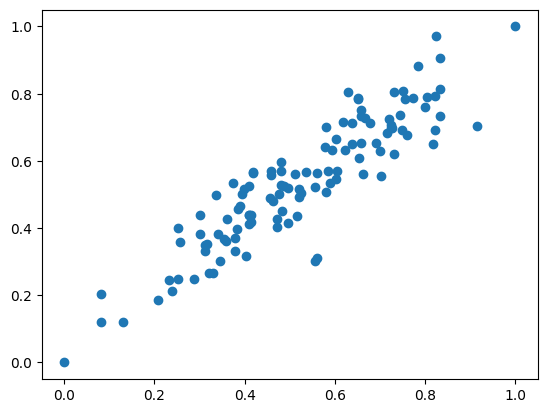

In [2]:
norm_x = [(i - min(X)) / (max(X) - min(X)) for i in X]
norm_y = [(i - min(Y)) / (max(Y) - min(Y)) for i in Y]
plt.scatter(norm_x, norm_y)

### Второй пункт: Определить «грубую» верхнюю оценку количества кластеров $\tilde k$.

In [3]:
print(k := round(np.floor((len(X) / 2)**0.5)), 'максимальное значение количества кластеров, больше делать не целесообразно')

7 максимальное значение количества кластеров, больше делать не целесообразно


### Третий пункт: Реализовать алгоритм k-means. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

In [4]:
def k_means(x, y, k, cent = None):
    if cent :
        centers = cent.copy()
    else:
        centers = []
        while len(centers) != k:
            p = random.randint(0, len(x) - 1)
            if [x[p], y[p]] not in centers: centers.append([x[p], y[p]])
        
    flag = True
    
    while flag:
        clusters = [[] for i in range(1, k + 1)]
        centers_prev = centers.copy()
        
        for j in range(len(x)):
            dist = [(x[j] - center[0])**2 + (y[j] - center[1])**2 for center in centers]
            clusters[np.argmin(dist)].append([x[j],y[j]])
            
        for i in range(k):
            centers[i] = (np.mean(np.array(clusters[i])[:,0]), np.mean(np.array(clusters[i])[:,1]))
            
        if centers_prev == centers:
            flag = False
            
    return np.round(centers,4), clusters

Кол-во кластеров: 1
Центроиды:
[0.5286 0.5408]
Объём кластеров:
[116]


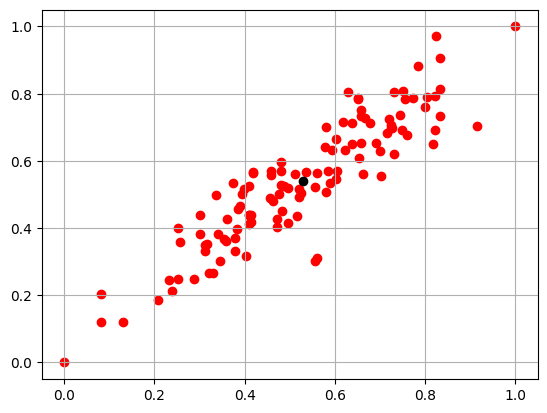

Кол-во кластеров: 2
Центроиды:
[0.7059 0.7073]
[0.3846 0.4055]
Объём кластеров:
[52, 64]


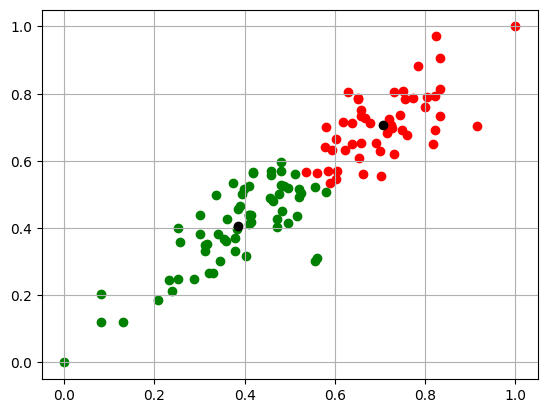

Кол-во кластеров: 3
Центроиды:
[0.4738 0.492 ]
[0.7223 0.7267]
[0.2709 0.2865]
Объём кластеров:
[45, 46, 25]


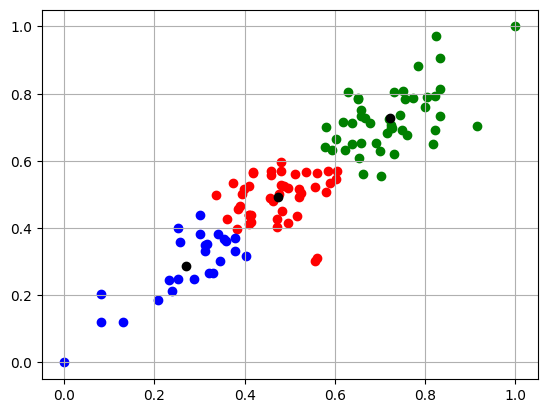

Кол-во кластеров: 4
Центроиды:
[0.4595 0.4839]
[0.6389 0.6362]
[0.2709 0.2865]
[0.7718 0.7756]
Объём кластеров:
[40, 24, 25, 27]


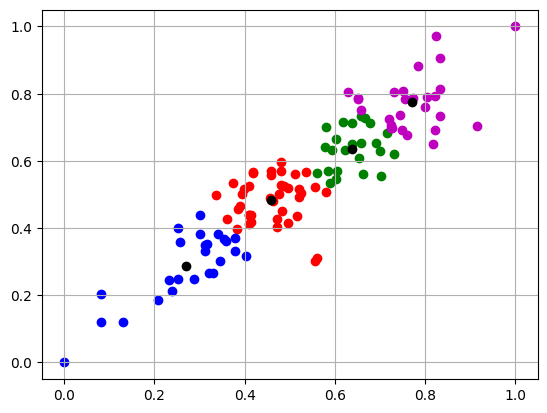

Кол-во кластеров: 5
Центроиды:
[0.8144 0.8011]
[0.6617 0.6717]
[0.3581 0.3519]
[0.1529 0.1669]
[0.4678 0.5052]
Объём кластеров:
[17, 32, 23, 8, 36]


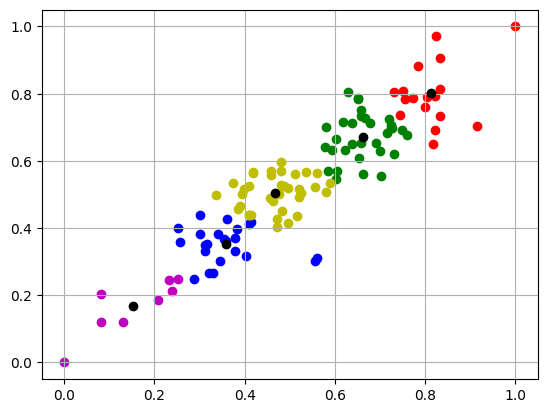

Кол-во кластеров: 6
Центроиды:
[0.6756 0.6837]
[0.3524 0.3418]
[0.1529 0.1669]
[0.819  0.8155]
[0.5252 0.536 ]
[0.4187 0.4703]
Объём кластеров:
[31, 20, 8, 15, 21, 21]


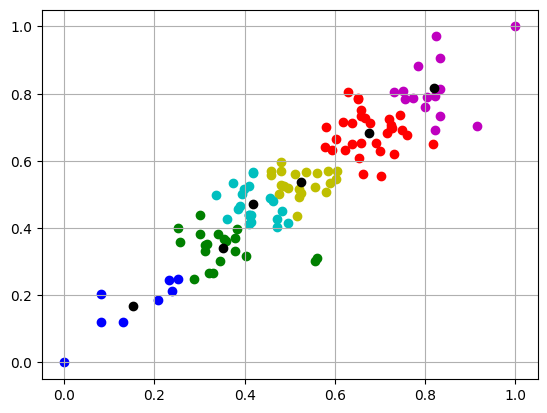

Кол-во кластеров: 7
Центроиды:
[0.3352 0.3532]
[0.6303 0.6021]
[0.819  0.8155]
[0.4173 0.5083]
[0.5111 0.4722]
[0.69   0.7173]
[0.1529 0.1669]
Объём кластеров:
[20, 16, 15, 18, 19, 20, 8]


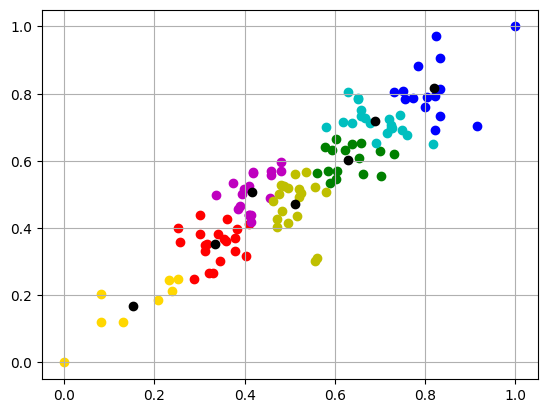

In [5]:
colors = ['r', 'g', 'b', 'm', 'y', 'c', 'gold', 'lime', 'darkorange', 'pink','blueviolet','skyblue','olive']

for i in range(1, k+1):
    centers, clusters = k_means(norm_x, norm_y, i)
    print(f'Кол-во кластеров: {i}', 'Центроиды:', *centers, 'Объём кластеров:', [len(i) for i in clusters], sep = '\n')
    
    for i in range(len(centers)):
        plt.scatter(np.array(clusters[i])[:,0], np.array(clusters[i])[:,1], color = colors[i])
        plt.plot(centers[i][0], centers[i][1], 'o', color = 'k')
    
    plt.grid(True)
    plt.show()

### Четвертый пункт:  Реализовать алгоритм k-medoids (для чётных вариантов). Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

In [6]:
def center(cluster):
    dist = [0]* len(cluster)
    
    for i in range(len(cluster)):
        for j in cluster:
            dist[i] += ((cluster[i][0] - j[0])**2 + (cluster[i][1] - j[1])**2)
            
    return cluster[np.argmin(dist)]

In [7]:
def k_medoids(x, y, k):
    centers = []
    while len(centers) != k:
        p = random.randint(0, len(x) - 1)
        if [x[p], y[p]] not in centers: centers.append([x[p], y[p]])
        
    flag = True
    
    while flag:
        clusters = [[] for i in range(1, k + 1)]
        centers_prev = centers.copy()
        
        for j in range(len(x)):
            dist = [(x[j] - center[0])**2 + (y[j] - center[1])**2 for center in centers]
            clusters[np.argmin(dist)].append([x[j],y[j]])
            
        for i in range(k):
            centers[i] = center(clusters[i])
            
        if centers_prev == centers:
            flag = False
            
    return np.round(centers,4), clusters

Кол-во кластеров: 1
Центроиды:
[0.5122 0.5597]
Объём кластеров:
[116]


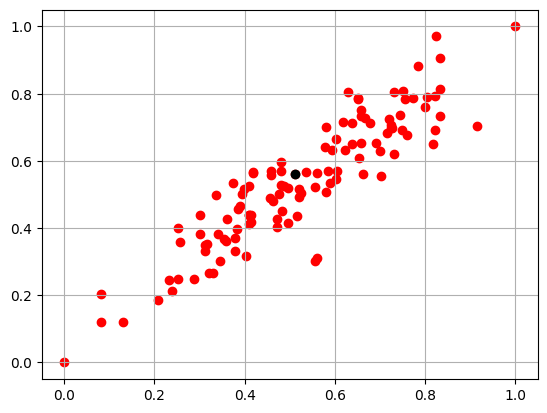

Кол-во кластеров: 2
Центроиды:
[0.3821 0.3967]
[0.7236 0.7071]
Объём кластеров:
[65, 51]


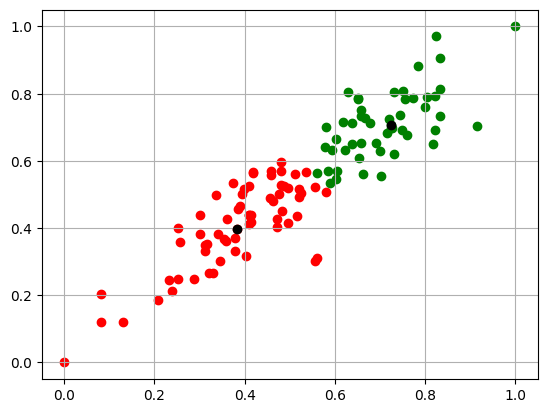

Кол-во кластеров: 3
Центроиды:
[0.7195 0.7245]
[0.2073 0.1872]
[0.4146 0.4394]
Объём кластеров:
[49, 11, 56]


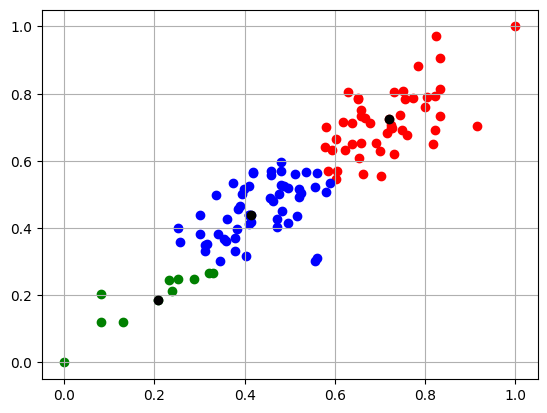

Кол-во кластеров: 4
Центроиды:
[0.4634 0.4821]
[0.7154 0.6838]
[0.8333 0.9049]
[0.252  0.2473]
Объём кластеров:
[47, 39, 8, 22]


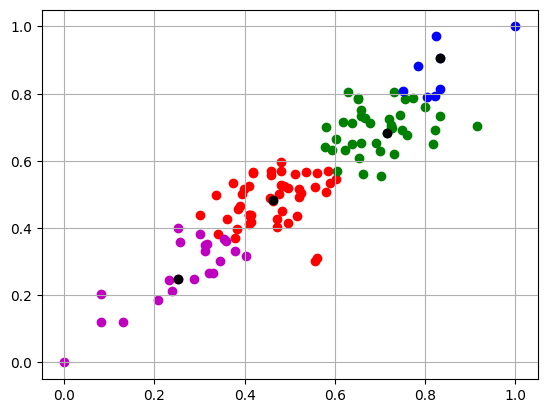

Кол-во кластеров: 5
Центроиды:
[0.2317 0.2444]
[0.6911 0.6528]
[0.4106 0.4122]
[0.7724 0.7886]
[0.5122 0.5597]
Объём кластеров:
[15, 26, 32, 19, 24]


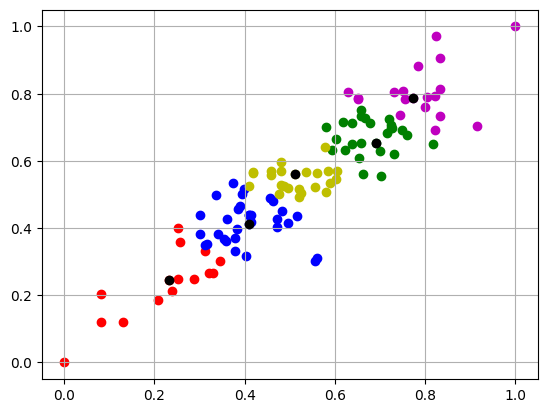

Кол-во кластеров: 6
Центроиды:
[0.2317 0.2444]
[0.6911 0.6528]
[0.6585 0.7333]
[0.5122 0.5597]
[0.4106 0.4122]
[0.8333 0.8138]
Объём кластеров:
[15, 17, 14, 24, 32, 14]


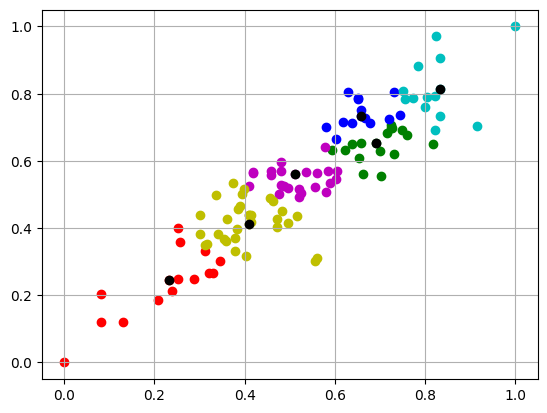

Кол-во кластеров: 7
Центроиды:
[0.6585 0.6528]
[0.4959 0.5199]
[0.3902 0.4646]
[0.3171 0.3531]
[0.2073 0.1872]
[0.7724 0.7886]
[0.4959 0.4151]
Объём кластеров:
[26, 23, 14, 16, 9, 21, 7]


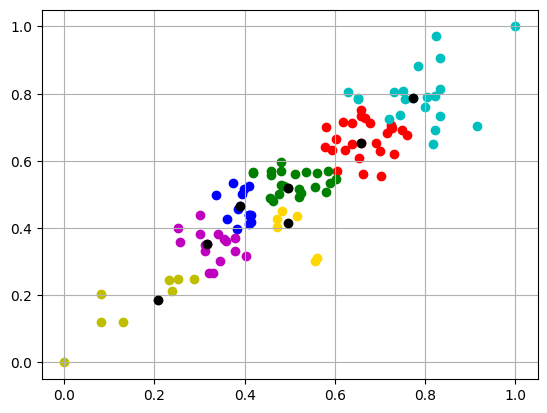

In [8]:
for i in range(1, k+1):
    centers, clusters = k_medoids(norm_x, norm_y, i)
    print(f'Кол-во кластеров: {i}', 'Центроиды:', *centers, 'Объём кластеров:', [len(i) for i in clusters], sep = '\n')
    
    for i in range(len(centers)):
        plt.scatter(np.array(clusters[i])[:,0], np.array(clusters[i])[:,1], color = colors[i])
        plt.plot(centers[i][0], centers[i][1], 'o', color = 'k')
    
    plt.grid(True)
    plt.show()

### Пятый пункт: Для каждого метода заполнить следующую таблицу, где значения 𝑘 изменяются от 1 до$\tilde k$:

In [9]:
table1 = [['Значение k', 'Центроиды кластера x_C_i', 'Объём кластера #C_i']]
table2 = [['Значение k', 'Центроиды кластера x_C_i', 'Объём кластера #C_i']]

for i in range(1, k+1):
    centers, clusters = k_medoids(norm_x, norm_y, i)
    table1.append([i, centers, [len(i) for i in clusters]])
    centers, clusters = k_medoids(norm_x, norm_y, i)
    table2.append([i, centers, [len(i) for i in clusters]])

print(tabulate(table1, tablefmt='fancy_grid'))
print()
print(tabulate(table2, tablefmt='fancy_grid'))

╒════════════╤══════════════════════════╤═════════════════════════════╕
│ Значение k │ Центроиды кластера x_C_i │ Объём кластера #C_i         │
├────────────┼──────────────────────────┼─────────────────────────────┤
│ 1          │ [[0.5122 0.5597]]        │ [116]                       │
├────────────┼──────────────────────────┼─────────────────────────────┤
│ 2          │ [[0.7236 0.7071]         │ [51, 65]                    │
│            │  [0.3821 0.3967]]        │                             │
├────────────┼──────────────────────────┼─────────────────────────────┤
│ 3          │ [[0.252  0.2473]         │ [22, 46, 48]                │
│            │  [0.7195 0.7245]         │                             │
│            │  [0.4634 0.4821]]        │                             │
├────────────┼──────────────────────────┼─────────────────────────────┤
│ 4          │ [[0.3577 0.3628]         │ [30, 7, 36, 43]             │
│            │  [0.1301 0.1193]         │                       

C:\Users\vivaf\OneDrive\Документы\5 сем\машинное обучение\env\lib\site-packages\tabulate\__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


### Шестой пункт: С помощью метода локтя (для чётных вариантов) выявить для каждого метода оптимальное количество кластеров.

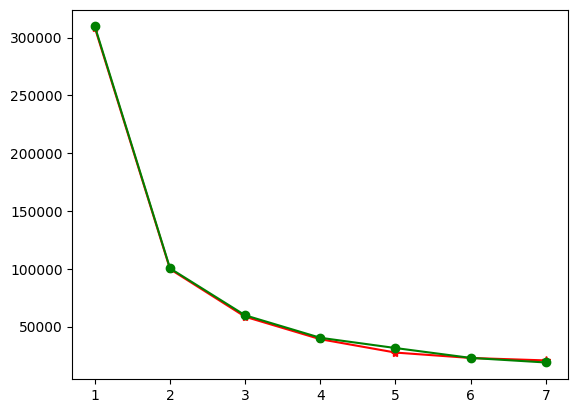

In [10]:
k_arr = [i + 1 for i in range(k)]
scatter_means, scatter_medoids = [], []

for i in range(1, k + 1):
    centers, clusters = k_means(X, Y, i)
    scatter_means.append(sum([sum([(centers[j][0]-t[0])**2 + (centers[j][1]-t[1])**2 for t in clusters[j]]) for j in range(len(clusters))]))
    centers, clusters = k_medoids(X, Y, i)
    scatter_medoids.append(sum([sum([(centers[j][0]-t[0])**2+(centers[j][1]-t[1])**2 for t in clusters[j]]) for j in range(len(clusters))]))

plt.plot(k_arr, scatter_means, marker = '*', color = 'r')
plt.plot(k_arr, scatter_medoids, marker='o', color = 'g')

Оптимальное кол-во кластеров для каждого метода = 3

### Седьмой пункт: Реализовать алгоритм поиска сгущений при различных радиусах 𝑅, отобразить полученные кластеры, выделить каждый кластер разным цветом или маркером, отметить центроиды.

In [11]:
def forel(x, y, R):
    centers = []
    clusters = []
    U = [[x[i], y[i]] for i in range(len(x))]
    
    while len(U) != 0:
        xc = U[0]
        flag = True
        
        while flag:
            cluster = [i for i in U if ((xc[0] - i[0])**2 + (xc[1] - i[1])**2)**0.5 <= R]
            x_c = [sum(np.array(cluster)[:,0]) / len(cluster), sum(np.array(cluster)[:,1]) / len(cluster)]
            if xc == x_c:
                flag = False
            xc = x_c.copy()
            
        U = [i for i in U if i not in cluster]
        centers.append(xc)
        clusters.append(cluster)
        
    return np.round(centers, 4),clusters

D = [[((norm_x[i]-norm_x[j])**2 + (norm_y[i]-norm_y[j])**2)**0.5 if i > j else 0 for i in range(len(X))] for j in range(len(X))]
Rmin = min([i for j in D for i in j if i > 0])
Rmax = max([i for j in D for i in j])
print('Rmin =', round(Rmin, 4), '\nRmax =', round(Rmax, 4))

Rmin = 0.0019 
Rmax = 1.4142


R = 0.8071


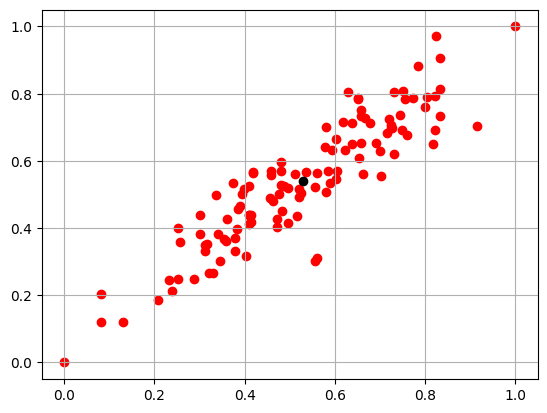

R = 0.302


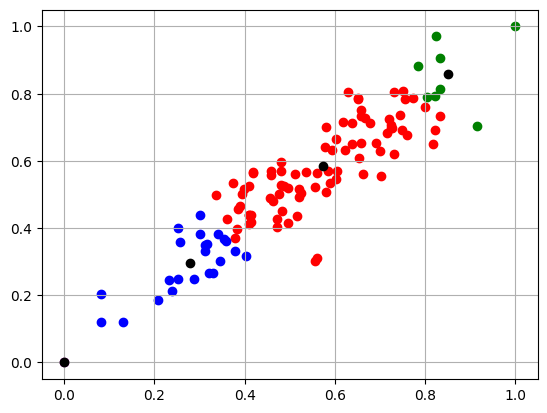

R = 0.2179


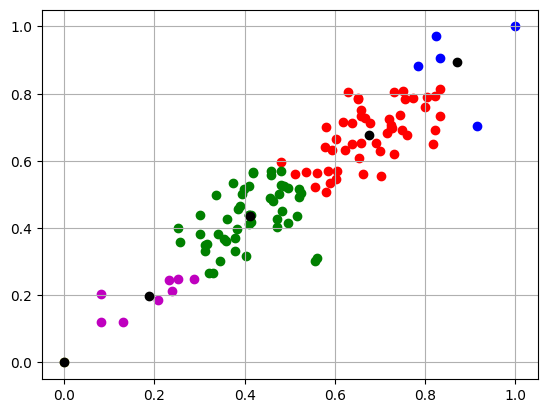

R = 0.1832


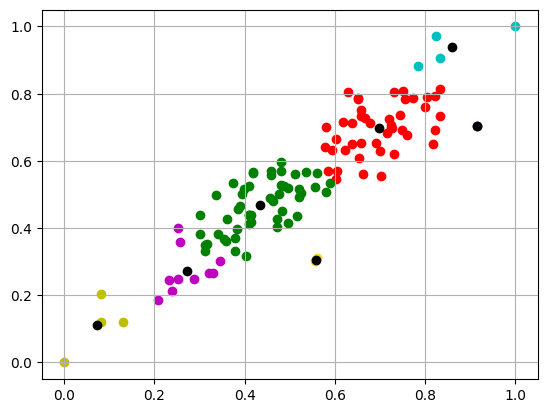

╒════════════╤══════════════════════════╤══════════════════════════╕
│ Значение R │ Центроиды кластера x_C_i │ Объём кластера #C_i      │
├────────────┼──────────────────────────┼──────────────────────────┤
│ 0.8071     │ [[0.5286 0.5408]]        │ [116]                    │
├────────────┼──────────────────────────┼──────────────────────────┤
│ 0.302      │ [[0.5727 0.5842]         │ [84, 8, 23, 1]           │
│            │  [0.8521 0.8578]         │                          │
│            │  [0.278  0.2953]         │                          │
│            │  [0.     0.    ]]        │                          │
├────────────┼──────────────────────────┼──────────────────────────┤
│ 0.2179     │ [[0.6761 0.6765]         │ [51, 51, 5, 8, 1]        │
│            │  [0.4112 0.435 ]         │                          │
│            │  [0.8715 0.8929]         │                          │
│            │  [0.189  0.198 ]         │                          │
│            │  [0.     0.    ]]  

In [12]:
R = [Rmax / i + 0.1  for i in range(2, 18, 5)] 
table3 = [['Значение R', 'Центроиды кластера x_C_i', 'Объём кластера #C_i']]

for r in R:
    centers, clusters = forel(norm_x, norm_y, r)
    print('R =', round(r,4))
    table3.append([round(r, 4), centers, [len(i) for i in clusters]])
    
    for j in range(len(centers)):
        plt.scatter(np.array(clusters[j])[:,0], np.array(clusters[j])[:,1], color = colors[j])
        plt.plot(centers[j][0], centers[j][1], 'o', color = 'k')
    
    plt.grid(True)
    plt.show()

print(tabulate(table3, tablefmt='fancy_grid'))

### Восмой пункт: Проверить чувствительность метода поиска сгущений к погрешностям.

Добавим к R из предыдущего пункта небольшое значение $\epsilon = 0.01$ и пересчитаем кластеры.

In [13]:
table4 = [['Значение R', 'Центроиды кластера x_C_i', 'Объём кластера #C_i']]

for r in R:
    centers, clusters = forel(norm_x, norm_y, r + 0.01)
    table4.append([round(r + 0.01, 4), centers, [len(i) for i in clusters]])

print(tabulate(table3, tablefmt='fancy_grid'))
print(tabulate(table4, tablefmt='fancy_grid'))

╒════════════╤══════════════════════════╤══════════════════════════╕
│ Значение R │ Центроиды кластера x_C_i │ Объём кластера #C_i      │
├────────────┼──────────────────────────┼──────────────────────────┤
│ 0.8071     │ [[0.5286 0.5408]]        │ [116]                    │
├────────────┼──────────────────────────┼──────────────────────────┤
│ 0.302      │ [[0.5727 0.5842]         │ [84, 8, 23, 1]           │
│            │  [0.8521 0.8578]         │                          │
│            │  [0.278  0.2953]         │                          │
│            │  [0.     0.    ]]        │                          │
├────────────┼──────────────────────────┼──────────────────────────┤
│ 0.2179     │ [[0.6761 0.6765]         │ [51, 51, 5, 8, 1]        │
│            │  [0.4112 0.435 ]         │                          │
│            │  [0.8715 0.8929]         │                          │
│            │  [0.189  0.198 ]         │                          │
│            │  [0.     0.    ]]  

#### Выводы: Для $\epsilon = 0.01$ изменились центры кластеров, но количество почти не изменилось, можно сделать вывод  что метод сгущенияч имеет малую чувствительность.

### Девятый пункт: Сравнить методы.

Метод локтя показывает, что методы K-means и K-medoids имеют схожие результаты и оптичальное значение количества кластеров равно 3.  
Для алгоритма поиска сгущений сложно определить оптимальное значение радиуса и деление на кластеры размыто.  
Следовательно для данной выборки лучше использовать k-means или k-medoids.

#### Выводы:

### Десятый пункт: Реализовать модификацию k-means++. Объяснить её приемущества. Сравнить с обычным методом k-means.

Выбор центроидов в методе k-means++ не случаен, что позволит точнее разделить на кластерыю при этом с мненьшим количеством итераций.

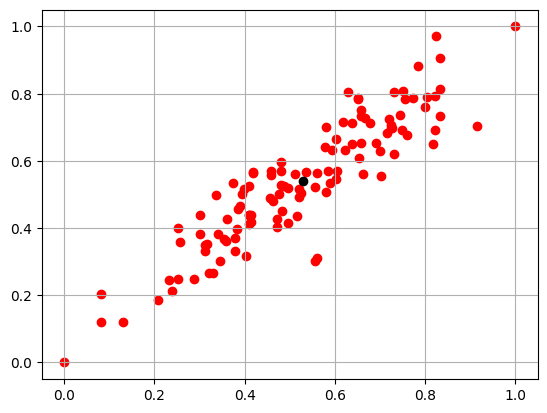

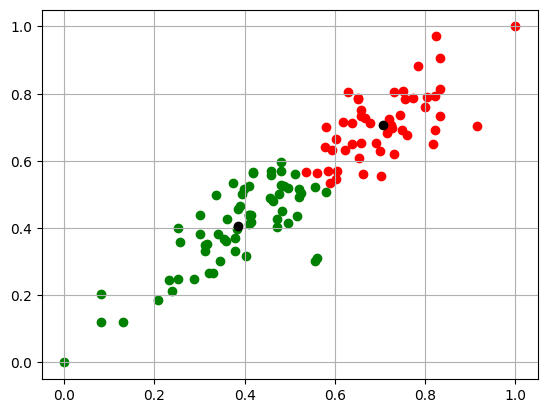

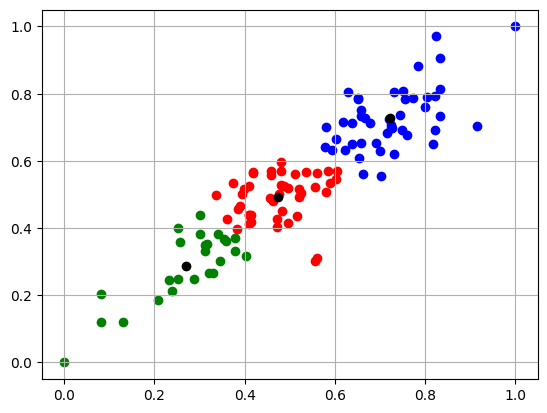

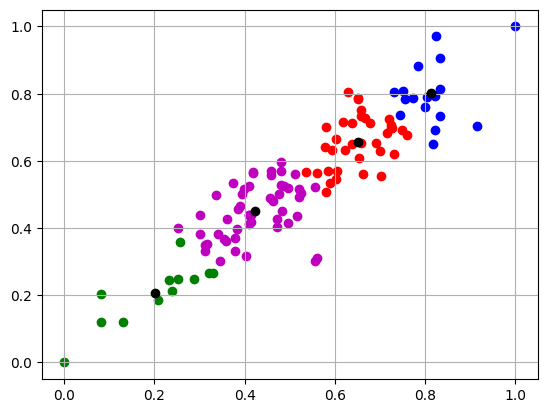

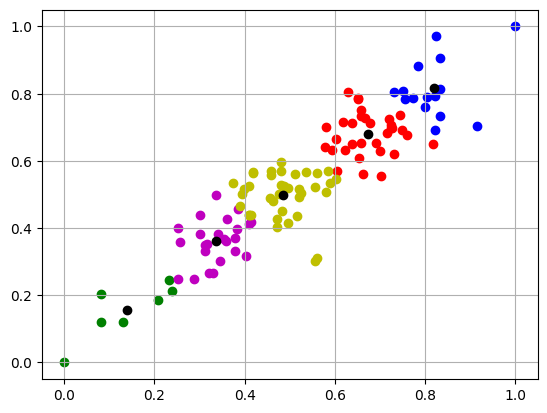

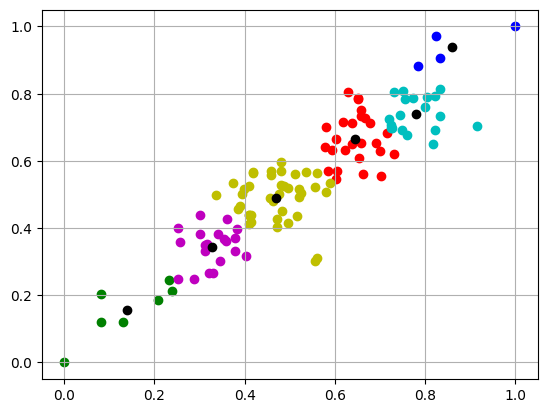

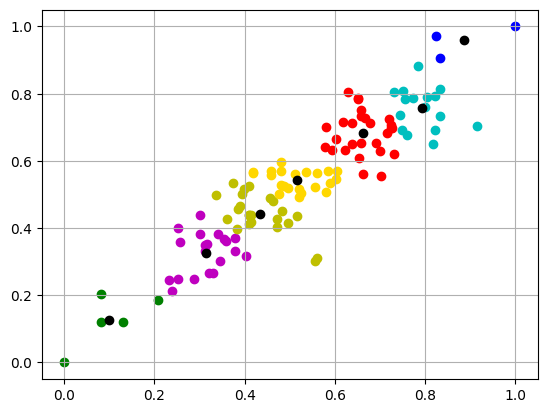

In [14]:
C = [1]
for i in range(1, k+1):
    centers, clusters = k_means(norm_x, norm_y, i, [[norm_x[j], norm_y[j]] for j in C])
    
    for j in range(len(centers)):
        plt.scatter(np.array(clusters[j])[:,0], np.array(clusters[j])[:,1], color = colors[j])
        plt.plot(centers[j][0], centers[j][1], 'o', color = 'k')
    
    plt.grid(True)
    plt.show()
    
    distance = []
    for j in range(len(X)):
        distance.append(min(((norm_x[j]-norm_x[C[t]])**2 + (norm_y[j]-norm_y[C[t]])**2)**0.5 for t in range(len(C))))

    distance = distance / sum(np.array(distance)**2)
    C.append(np.argmax(distance))

#### Выводы: k-means++ логичнее распределил по кластерам, чем k-means.

## Выводы
В ходе выполнения практической работы была нормализованна двумерная выборка.
Изучены различные методы кластеризациии такие как K-means и K-medoids.  
Полученаоценка оптимального количества кластеров при помощи метода силуэтов(локтя).  
Реализован метод сгущения с дальнейшей проверкой чувствительности.
Затем были сравнены все методы получения кластера.  
И в конце использовали модификацию лучшего метода для данной выборки.